# IMPLEMENTASI PCA

In [148]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [149]:
dataset = pd.read_csv('https://gist.githubusercontent.com/Rezayoga1383/2a7ce9a8fef475b7600cd2e7bd5ec6cf/raw/c63268d2b576d69fc169d5402f2f4c024d3282e7/databaru.csv')
baris = dataset.shape[0]
dataset.head(baris)

,tugas,uts,uas,label
0,80,80,70,lulus
1,50,60,70,tidak lulus
2,90,80,80,lulus
3,50,60,70,tidak lulus
4,50,60,70,tidak lulus


In [150]:
dataset_copy = dataset.copy()
dataset_copy.isnull().sum()

tugas    0
uts      0
uas      0
label    0
dtype: int64

In [151]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tugas   5 non-null      int64 
 1   uts     5 non-null      int64 
 2   uas     5 non-null      int64 
 3   label   5 non-null      object
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


In [152]:
# features and target
X = dataset_copy[['tugas', 'uts', 'uas']]
y = dataset_copy['label']

In [153]:
# Normalisasi pada X
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Normalisasi pada y
label = LabelEncoder()
y = label.fit_transform(y)

In [154]:
# Menyimpan normalisasi ke file
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Menyimpan normalisasi ke file
with open('label.pkl', 'wb') as file:
    pickle.dump(label, file)

In [155]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat = pd.DataFrame(X, columns=['tugas', 'uts', 'uas'])
liat['target'] = y

# Menampilkan DataFrame yang digabungkan
liat.head(baris)

,tugas,uts,uas,target
0,0.75,1.0,0.0,0
1,0.00,0.0,0.0,1
2,1.00,1.0,1.0,0
3,0.00,0.0,0.0,1
4,0.00,0.0,0.0,1


In [156]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# Model KNN

In [157]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_prediksi_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_prediksi_knn)))

Accuracy: 1.00


In [158]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat_knn = pd.DataFrame(y_test, columns=['y_test'])
liat_knn['y_prediksi_knn'] = y_prediksi_knn

# Menampilkan DataFrame yang digabungkan
liat_knn.head(baris)

,y_test,y_prediksi_knn
0,1,1


In [159]:
# Menyimpan model ke file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

In [160]:
# Load model dari file
with open('knn_model.pkl', 'rb') as file:
    knn_loaded = pickle.load(file)

# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Buat data baru
data_baru = np.array([[65, 70, 50]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.fit_transform(data_baru)

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_loaded.predict(data_baru_scaled)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['tidak lulus']


#Model KNN dengan PCA

In [161]:
# Membangun PCA dengan 3 fitur
pca = PCA(n_components=2)
X_new=pca.fit_transform(X)

In [162]:
# Menyimpan pca ke file
with open('pca.pkl', 'wb') as file:
    pickle.dump(pca, file)

In [163]:
# Split data into train and test data
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size = 0.6, random_state=42, stratify=y)

In [164]:
# Membangun model KNN dengan PCA
knn_pca = KNeighborsClassifier(n_neighbors=2)

# Melatih model dengan data latih
knn_pca.fit(X_train_new, y_train_new)

# Memprediksi kelas target untuk data uji
y_prediksi_knn_pca = knn_pca.predict(X_test_new)

# Menghitung akurasi prediksi
print('Accuracy: {:.2f}'.format(accuracy_score(y_test_new, y_prediksi_knn_pca)))

Accuracy: 0.33


<ipython-input-165-182a28de6fe7>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


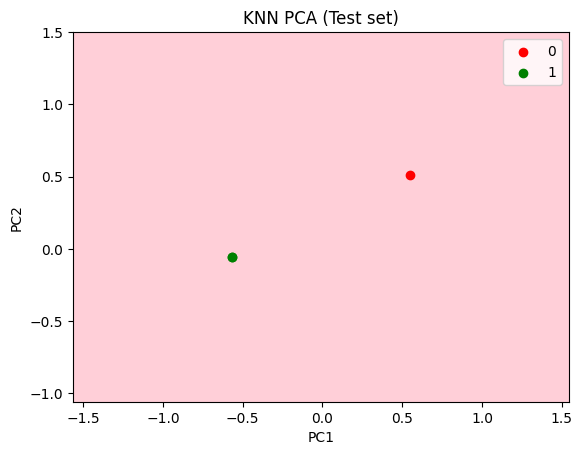

In [165]:
# Visualisasi
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test_new
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [166]:
# Membuat DataFrame dari X dan y menggunakan pandas
liat_knn_pca = pd.DataFrame(y_test_new, columns=['y_test_new'])
liat_knn_pca['y_prediksi_knn_pca'] = y_prediksi_knn_pca

# Menampilkan DataFrame yang digabungkan
liat_knn_pca.head(baris)

,y_test_new,y_prediksi_knn_pca
0,1,0
1,1,0
2,0,0


In [167]:
# Menyimpan model ke file
with open('knn_pca_model.pkl', 'wb') as file:
    pickle.dump(knn_pca, file)

In [168]:
# Load normalisasi dari file
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('label.pkl', 'rb') as file:
    label = pickle.load(file)

# Load pca dari file
with open('pca.pkl', 'rb') as file:
    pca = pickle.load(file)

# Load model dari file
with open('knn_pca_model.pkl', 'rb') as file:
    knn_pca_loaded = pickle.load(file)

# Buat data baru
data_baru = np.array([[20, 40, 30]])

# Scaling data baru menggunakan skalar yang telah dilatih sebelumnya
data_baru_scaled = scaler.transform(data_baru)  # Menggunakan transform() bukan fit_transform()

# Transformasikan data baru menggunakan PCA yang telah dilatih sebelumnya
data_baru_pca = pca.transform(data_baru_scaled)  # Menggunakan transform() bukan fit_transform()

# Menggunakan model untuk melakukan prediksi pada data baru
y_pred = knn_pca_loaded.predict(data_baru_pca)
y_pred_scaled = label.inverse_transform(y_pred)

print(y_pred_scaled)

['lulus']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
